In [8]:
%load_ext autoreload
%autoreload 2
from dynairxvis import plot
from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
categories = ['Nominal 1', 'Nominal 2', 'Nominal 2', 'Nominal 3']
tasks = [
    (datetime(2015, 1, 1), datetime.now()),  # N 1
    (datetime(2017, 1, 1), datetime(2019, 6, 1)),  # N 2
    (datetime(2021, 7, 1), datetime.now()), # Continuation of N 2 (after a gap)
    (datetime(2023, 1, 1), datetime.now()),  # N 3
]
start_col, end_col = zip(*tasks)


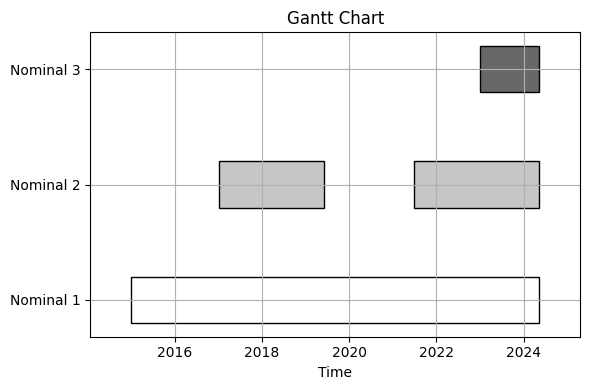

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Gantt Chart'}, xlabel='Time'>)

In [11]:
plot.gantt(categories,start_col, end_col)

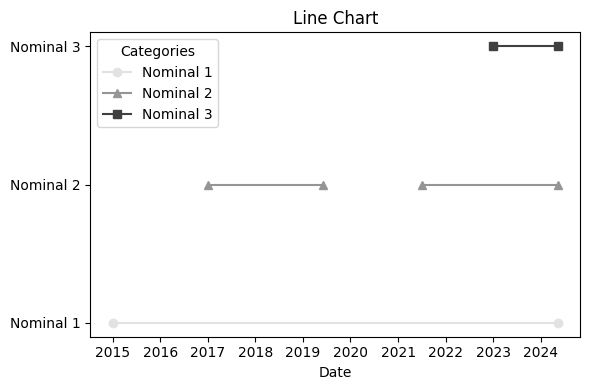

In [12]:
from dynairxvis.time import line
line(categories, start_dates=start_col, end_dates=end_col)

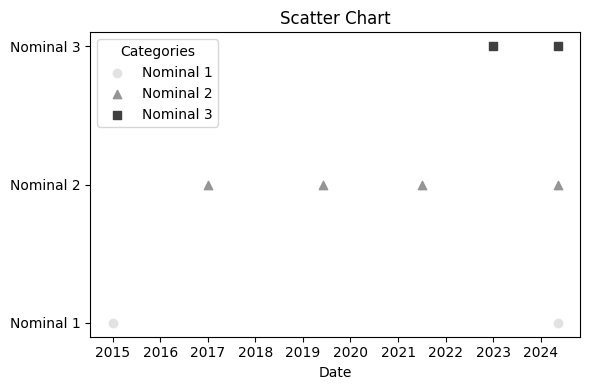

In [13]:
plot.scatter(categories, start_dates=start_col, end_dates=end_col)

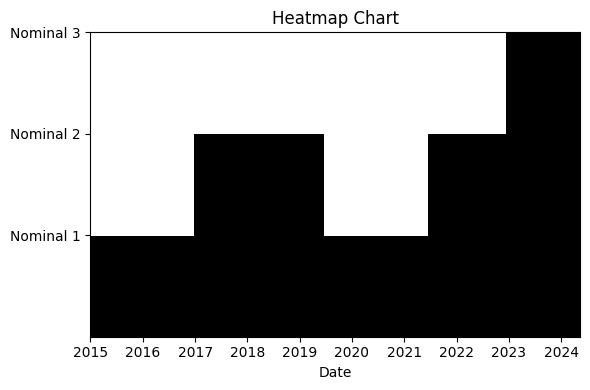

In [14]:
plot.heatmap(categories, start_dates=start_col, end_dates=end_col, mode='gantt')

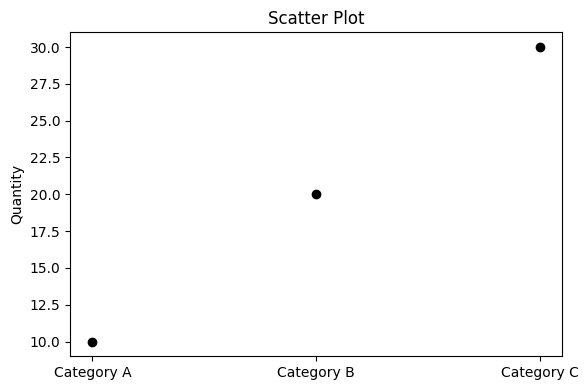

In [15]:
categories = ['Category A', 'Category B', 'Category C']
values = [10, 20, 30] # For 'scatter' mode

plot.scatter(categories, values=values, mode='scatter')

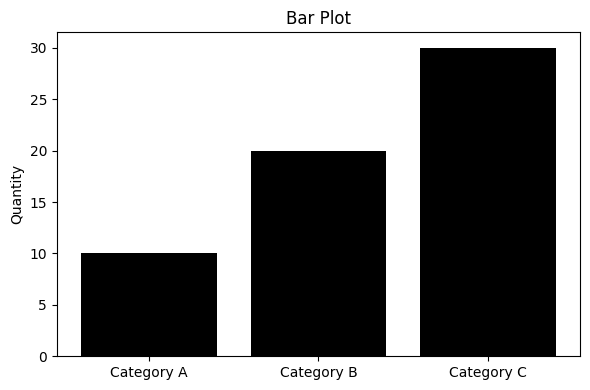

In [16]:
plot.scatter(categories, values=values, mode='bar')

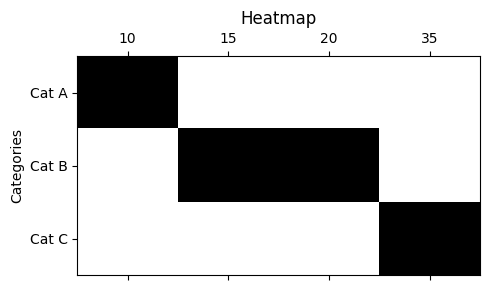

In [17]:
categories = ['Cat A', 'Cat B', 'Cat C']
values = [10, [15, 20], 35]
from dynairxvis.plot import heatmap
heatmap(categories, values)

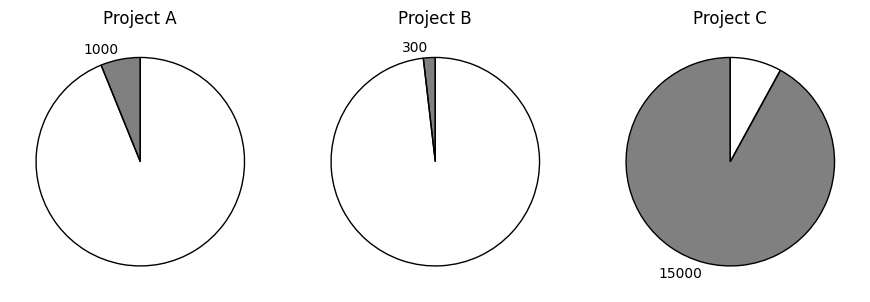

In [18]:
from dynairxvis.pie import pie
values = [1000, 300, 15000]
categories = ['Project A', 'Project B', 'Project C']
pie(categories, values)

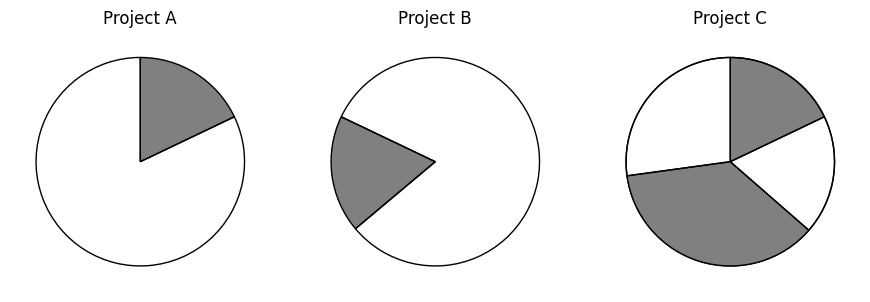

In [19]:
from dynairxvis.plot import pie
import datetime
categories = ['Project A', 'Project B', 'Project C', 'Project C']
start_dates = [datetime.datetime(2020, 1, 1), datetime.datetime(2020, 5, 1), datetime.datetime(2020, 8, 1), datetime.datetime(2020, 1, 1)]
end_dates = [datetime.datetime(2020, 3, 1), datetime.datetime(2020, 7, 1), datetime.datetime(2020, 12, 1), datetime.datetime(2020, 3, 1)]
pie(categories, time=True, start_dates=start_dates, end_dates=end_dates)

## Evaluation Charts 
These charts are based on the N, Q etc combinations for conditions, medications and investigation data type combinations.

In [40]:
# Example DataFrame
from dynairxvis.utils import profile
from dynairxvis.plot import plot_charts
import pandas as pd
df = pd.DataFrame({
    'Blood_Pressure': [120, 130, 125, 140],
    'Condition': ['Diabetes', 'Hypertension', 'Asthma', 'COPD'],
    'Start_Date': pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-06']),
    'End_Date': pd.to_datetime(['2021-06-01', '2021-02-02', '2021-08-03', '2021-10-04']),
    'Pain_Scale': pd.Categorical(['low', 'high', 'medium', 'extreme'], ordered=True)
})
print(profile(df, 5))


({'Blood_Pressure': 'Q', 'Condition': 'N', 'Start_Date': 'T', 'End_Date': 'T', 'Pain_Scale': 'O'}, 'NOQTT', ['No appropriate chart found'])


In [41]:
# from dynairxvis.time import grouped_chart
# grouped_chart(df['Condition'], df['Start_Date'], df['End_Date'], values=[1,3,1])

Q ['Blood_Pressure']
Plotting histogram for Blood_Pressure...


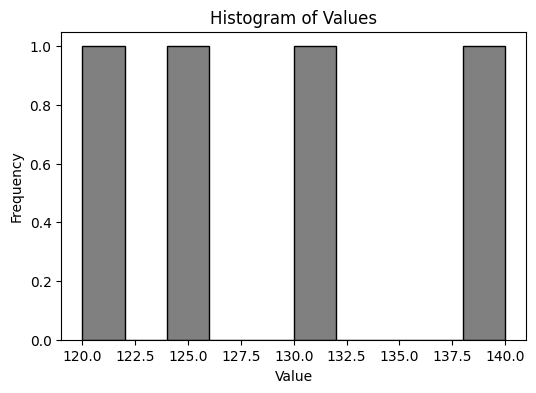

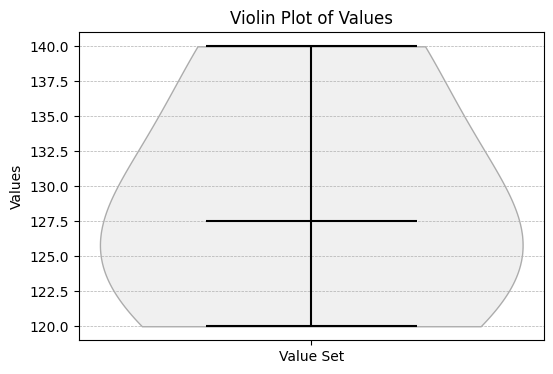

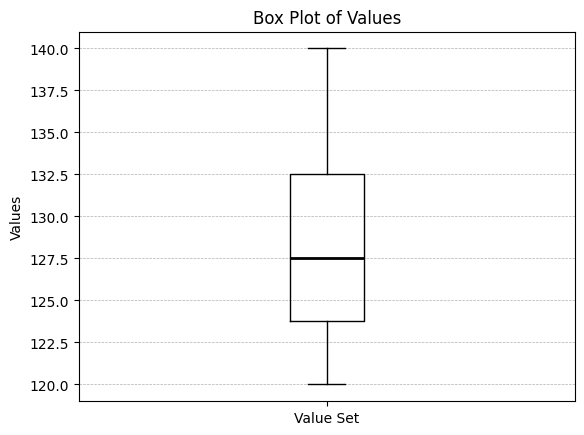

In [46]:
############################## Q
plot_charts(df, column_refs=['Blood_Pressure'])

NQ ['Blood_Pressure', 'Condition']


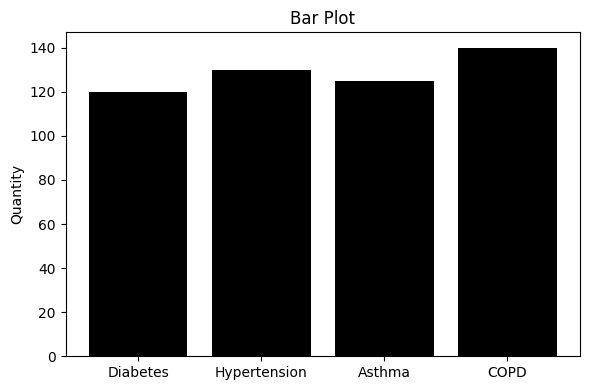

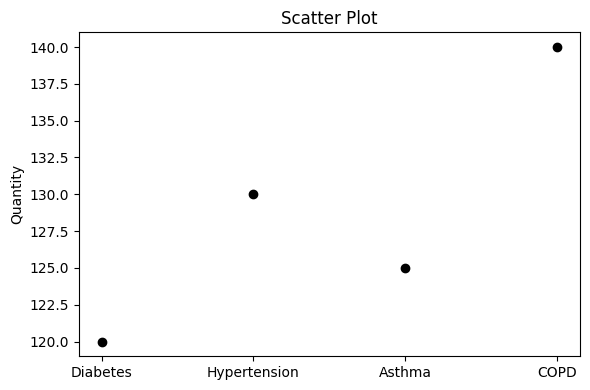

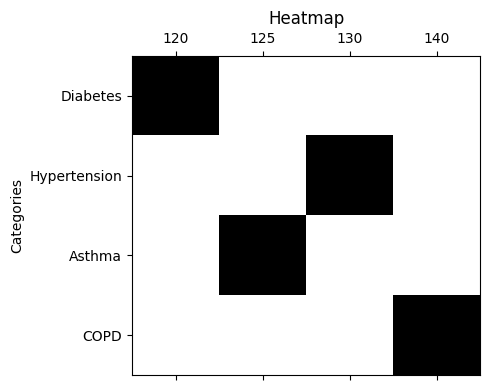

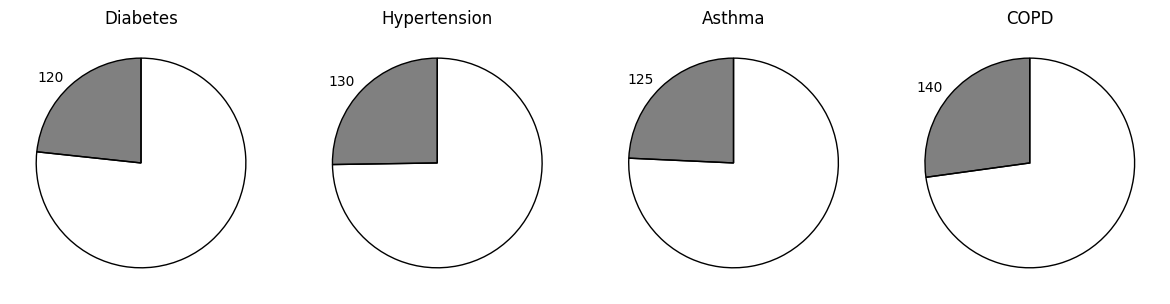

In [47]:
############################## NQ
plot_charts(df, column_refs=['Blood_Pressure', 'Condition'])

NTT ['Start_Date', 'End_Date', 'Condition']
['Asthma', 'COPD', 'Diabetes', 'Hypertension']


AttributeError: 'NoneType' object has no attribute 'empty'

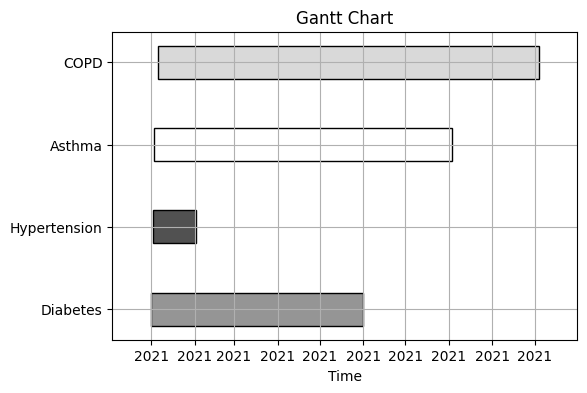

In [49]:
############################## NT
plot_charts(df, column_refs=['Start_Date', 'End_Date', 'Condition'])

Index(['Blood_Pressure', 'Condition', 'Start_Date', 'End_Date', 'Pain_Scale'], dtype='object')
NOTT
['low', 'medium', 'high']


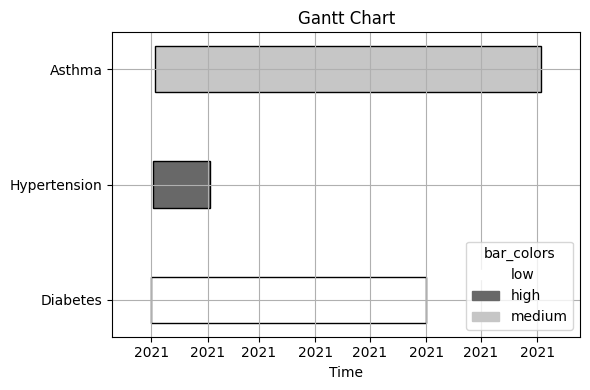

NTO charts coming...


In [39]:
############################## NOT
print(df.columns)
plot_charts(df, column_refs=['Start_Date', 'End_Date', 'Pain_Scale', 'Condition'])

NQTT
[120, 130, 125]


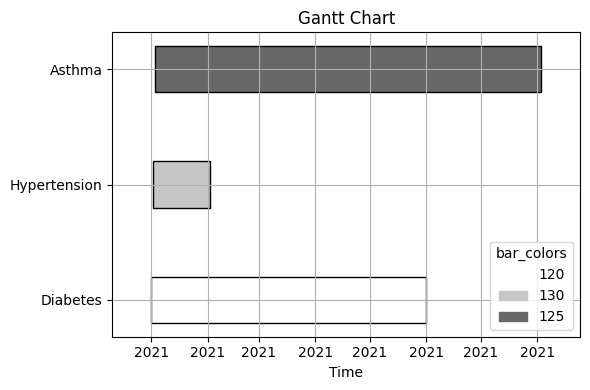

NQT charts coming...


In [38]:
############################## NQT
plot_charts(df, column_refs=['Start_Date', 'End_Date', 'Blood_Pressure', 'Condition'])